In [1]:
import scrublet as scr

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import scanpy as sc

In [33]:
cellranger_matrix = ("/lab-share/IM-Gutierrez-e2/Public/Lab_datasets/"
                     "CITEseq_MX/SN0274885/broad/hptmp/sgurajal/bwh10x/"
                     "KW10748_mariagutierrezarcelus/230126_10X_KW10748_bcl"
                     "/cellranger-7.1.0/GRCh38/BRI-2120_ADT/outs/"
                     "filtered_feature_bc_matrix")

In [34]:
adata = sc.read_10x_mtx(cellranger_matrix)

In [35]:
adata

AnnData object with n_obs × n_vars = 16109 × 36601
    var: 'gene_ids', 'feature_types'

In [36]:
scrub = scr.Scrublet(adata.X, expected_doublet_rate = 0.05)

In [37]:
adata.obs['doublet_score'], adata.obs['predicted_doublets'] = scrub.scrub_doublets(min_gene_variability_pctl=60, n_prin_comps=30, min_cells=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 8.8%
Estimated detectable doublet fraction = 63.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 13.7%
Elapsed time: 39.7 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

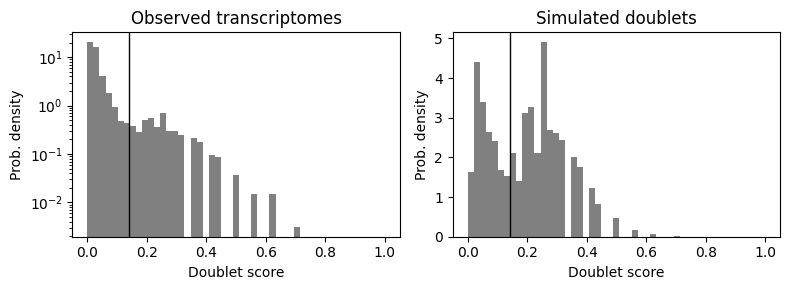

In [38]:
scrub.plot_histogram()

In [39]:
scrub.set_embedding('t-SNE', scr.get_tsne(scrub.manifold_obs_, angle = 0.9))

/home/ch229163/miniconda3/envs/scrublet/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ch229163/miniconda3/envs/scrublet/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(<Figure size 1000x500 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Predicted doublets'}, xlabel='t-SNE 1', ylabel='t-SNE 2'>,
        <AxesSubplot:title={'center':'Doublet score'}, xlabel='t-SNE 1', ylabel='t-SNE 2'>],
       dtype=object))

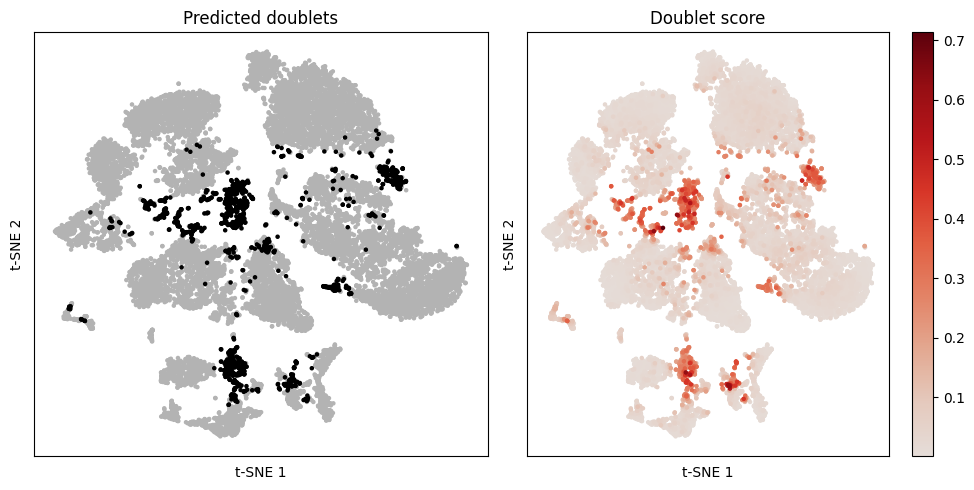

In [40]:
scrub.plot_embedding('t-SNE', order_points = 'True', fig_size=(10, 5))

In [41]:
pd.DataFrame(adata.obs).to_csv("./scrublet_calls.tsv", sep = '\t', header = True)